<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,83.410945,24.492014,-0.014012,117.888947,117.990430,-0.101482
1,0.0,1.0,66.821498,39.204519,3.956257,119.982275,116.089473,3.892802
2,0.0,2.0,45.068901,96.760625,2.459584,154.289110,151.876406,2.412704
3,0.0,3.0,22.838631,34.297806,-3.698267,63.438170,67.119108,-3.680938
4,0.0,4.0,71.858518,53.056339,-2.904867,132.009990,134.992744,-2.982754
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,21.786015,41.374401,-1.634547,71.525869,72.892894,-1.367026
249996,999.0,246.0,27.092472,26.036010,-1.578519,61.549964,62.831134,-1.281171
249997,999.0,247.0,62.112342,64.814662,1.856594,138.783598,136.956388,1.827210
249998,999.0,248.0,51.477016,87.435309,0.848469,149.760794,148.971119,0.789675


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.410945  24.492014 -0.014012  117.888947  117.990430 -0.101482
      1.0    66.821498  39.204519  3.956257  119.982275  116.089473  3.892802
      2.0    45.068901  96.760625  2.459584  154.289110  151.876406  2.412704
      3.0    22.838631  34.297806 -3.698267   63.438170   67.119108 -3.680938
      4.0    71.858518  53.056339 -2.904867  132.009990  134.992744 -2.982754
...                ...        ...       ...         ...         ...       ...
999.0 245.0  21.786015  41.374401 -1.634547   71.525869   72.892894 -1.367026
      246.0  27.092472  26.036010 -1.578519   61.549964   62.831134 -1.281171
      247.0  62.112342  64.814662  1.856594  138.783598  136.956388  1.827210
      248.0  51.477016  87.435309  0.848469  149.760794  148.971119  0.789675
      249.0  62.292182  91.530973 -4.191591  159.631564  163.953383 -4.321820

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.410945  24.492014 -0.014012  117.888947  117.990430 -0.101482
      1.0    66.821498  39.204519  3.956257  119.982275  116.089473  3.892802
      2.0    45.068901  96.760625  2.459584  154.289110  151.876406  2.412704
      3.0    22.838631  34.297806 -3.698267   63.438170   67.119108 -3.680938
      4.0    71.858518  53.056339 -2.904867  132.009990  134.992744 -2.982754
...                ...        ...       ...         ...         ...       ...
999.0 245.0  21.786015  41.374401 -1.634547   71.525869   72.892894 -1.367026
      246.0  27.092472  26.036010 -1.578519   61.549964   62.831134 -1.281171
      247.0  62.112342  64.814662  1.856594  138.783598  136.956388  1.827210
      248.0  51.477016  87.435309  0.848469  149.760794  148.971119  0.789675
      249.0  62.292182  91.530973 -4.191591  159.631564  163.953383 -4.321820

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,83.410945,24.492014,-0.014012,117.888947,117.990430,-0.101482
1,0.0,1.0,66.821498,39.204519,3.956257,119.982275,116.089473,3.892802
2,0.0,2.0,45.068901,96.760625,2.459584,154.289110,151.876406,2.412704
3,0.0,3.0,22.838631,34.297806,-3.698267,63.438170,67.119108,-3.680938
4,0.0,4.0,71.858518,53.056339,-2.904867,132.009990,134.992744,-2.982754
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,21.786015,41.374401,-1.634547,71.525869,72.892894,-1.367026
249996,999.0,246.0,27.092472,26.036010,-1.578519,61.549964,62.831134,-1.281171
249997,999.0,247.0,62.112342,64.814662,1.856594,138.783598,136.956388,1.827210
249998,999.0,248.0,51.477016,87.435309,0.848469,149.760794,148.971119,0.789675


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.410945  24.492014 -0.014012  117.888947  117.990430 -0.101482
      1.0    66.821498  39.204519  3.956257  119.982275  116.089473  3.892802
      2.0    45.068901  96.760625  2.459584  154.289110  151.876406  2.412704
      3.0    22.838631  34.297806 -3.698267   63.438170   67.119108 -3.680938
      4.0    71.858518  53.056339 -2.904867  132.009990  134.992744 -2.982754
...                ...        ...       ...         ...         ...       ...
999.0 245.0  21.786015  41.374401 -1.634547   71.525869   72.892894 -1.367026
      246.0  27.092472  26.036010 -1.578519   61.549964   62.831134 -1.281171
      247.0  62.112342  64.814662  1.856594  138.783598  136.956388  1.827210
      248.0  51.477016  87.435309  0.848469  149.760794  148.971119  0.789675
      249.0  62.292182  91.530973 -4.191591  159.631564  163.953383 -4.321820

[250000 rows x 6 columns]

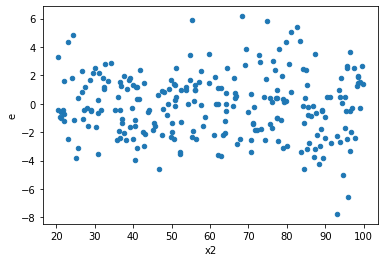

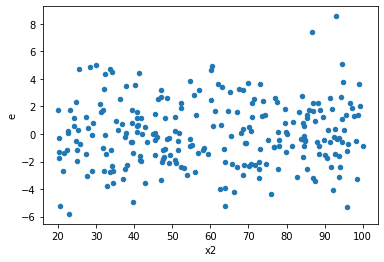

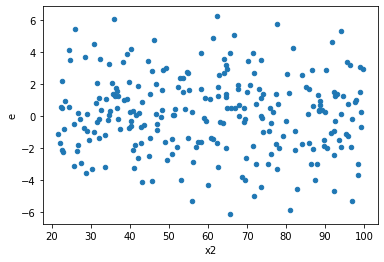

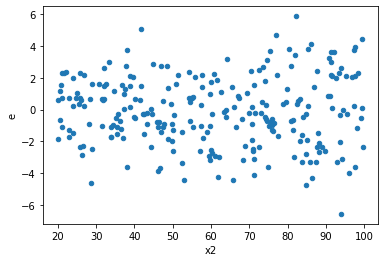

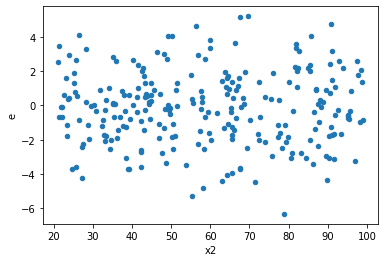

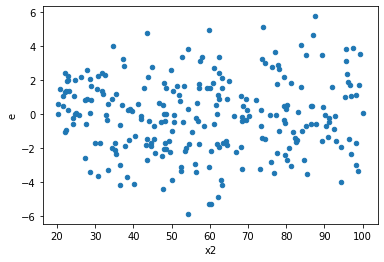

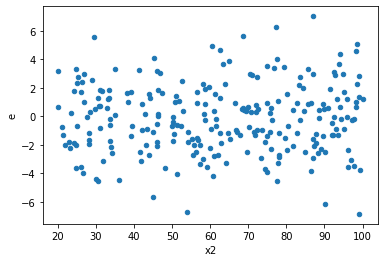

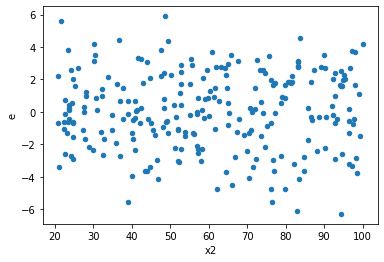

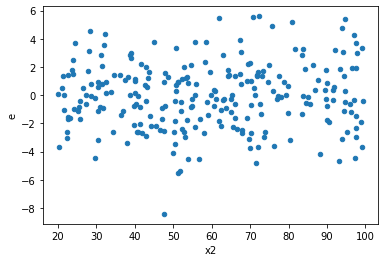

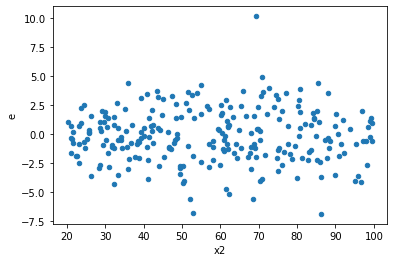

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,129.0,117.0,538.021519346359,535.183084482585,4.1707094522973565,4.574214397287051,1.096747315919461,0.6121283491077258,0.6939358254461371,0.3060641745538629,Reject005=1 : Homoscedasticity
2.0,115.0,131.0,527.1127569205634,731.067943944012,4.583589190613594,5.580671327816885,1.21753305013572,0.27470203059025833,0.8626489847048708,0.13735101529512916,Reject005=1 : Homoscedasticity
3.0,111.0,135.0,451.5251979884866,854.381624899484,4.067794576472852,6.328752777033214,1.5558191688531182,0.01436890193226592,0.992815549033867,0.00718445096613296,Reject005=0 : Heteroscedasticity
4.0,132.0,114.0,529.1653228785246,593.2901375951021,4.008828203625186,5.204299452588615,1.2982096483661643,0.15287714317619217,0.9235614284119039,0.07643857158809608,Reject005=1 : Homoscedasticity
7.0,106.0,140.0,525.0224071044929,793.9712351019829,4.953041576457481,5.671223107871306,1.1449980825574826,0.4517172854205014,0.7741413572897493,0.2258586427102507,Reject005=1 : Homoscedasticity
8.0,121.0,125.0,508.7182975556328,722.4488705044782,4.204283450872998,5.779590964035826,1.3746910815053928,0.07846735481513578,0.9607663225924321,0.03923367740756789,Reject005=1 : Homoscedasticity
10.0,128.0,118.0,608.5960670592925,634.303371529044,4.754656773900723,5.375452301093594,1.1305657919622176,0.4994608652227286,0.7502695673886357,0.2497304326113643,Reject005=1 : Homoscedasticity
11.0,123.0,123.0,675.8224554906516,687.90034533912,5.494491508054078,5.59268573446439,1.0178713946989224,0.9219112791278441,0.539044360436078,0.46095563956392205,Reject005=1 : Homoscedasticity
13.0,120.0,126.0,467.7120024453063,641.8546333620344,3.8976000203775527,5.094084391762178,1.3069797734834587,0.1383423690269856,0.9308288154865072,0.0691711845134928,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,129.0,117.0,538.021519346359,535.183084482585,4.1707094522973565,4.574214397287051,1.096747315919461,0.6121283491077258,Reject005=1 : Homoscedasticity
1.0,114.0,132.0,553.0870803166439,615.3220840548735,4.851641055409157,4.661530939809648,0.9608152966329706,0.8289198148356034,Reject005=1 : Homoscedasticity
2.0,115.0,131.0,527.1127569205634,731.067943944012,4.583589190613594,5.580671327816885,1.21753305013572,0.27470203059025833,Reject005=1 : Homoscedasticity
3.0,111.0,135.0,451.5251979884866,854.381624899484,4.067794576472852,6.328752777033214,1.5558191688531182,0.01436890193226592,Reject005=0 : Heteroscedasticity
4.0,132.0,114.0,529.1653228785246,593.2901375951021,4.008828203625186,5.204299452588615,1.2982096483661643,0.15287714317619217,Reject005=1 : Homoscedasticity
5.0,134.0,112.0,702.9734112162324,497.8346923459812,5.246070232956958,4.444952610231975,0.847291860926263,0.3573104483876557,Reject005=1 : Homoscedasticity
6.0,132.0,114.0,590.0197751280249,427.20220858310364,4.469846781272916,3.7473877945886285,0.8383705254258074,0.3276394328805574,Reject005=1 : Homoscedasticity
7.0,106.0,140.0,525.0224071044929,793.9712351019829,4.953041576457481,5.671223107871306,1.1449980825574826,0.4517172854205014,Reject005=1 : Homoscedasticity
8.0,121.0,125.0,508.7182975556328,722.4488705044782,4.204283450872998,5.779590964035826,1.3746910815053928,0.07846735481513578,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      804
Reject005=0 : Heteroscedasticity    196
Name: Result_test, dtype: int64